In [2]:
import numpy as np
import random
import pandas as pd
import scipy.io as sio   ## for loading octave matlab file
import math
from scipy.special import expit #Vectorized sigmoid function
import matplotlib.pyplot as plt
import scipy.optimize #fmin_cg to train neural network

In [3]:
mat_contents = sio.loadmat(r"C:\Users\user\Documents\Machine learning\machine-learning-ex5\ex5\ex5data1.mat")
# training data stored in arrays X, y
X=mat_contents['X']
y=mat_contents['y']          #### taking out X and y from the matrix
print('training data X \n' ,X)
print('training data y \n' ,y)

# test data stored in arrays Xtest, ytest
Xtest=mat_contents['Xtest']
ytest=mat_contents['ytest']        
print('test data Xtest \n' ,Xtest)
print('test data ytest \n' ,ytest)

# cross validation data stored in arrays X, y
Xval=mat_contents['Xval']
yval=mat_contents['yval']          
print('cross validation data Xval \n' ,Xval)
print('cross validation data yval \n' ,yval)


training data X 
 [[-15.93675813]
 [-29.15297922]
 [ 36.18954863]
 [ 37.49218733]
 [-48.05882945]
 [ -8.94145794]
 [ 15.30779289]
 [-34.70626581]
 [  1.38915437]
 [-44.38375985]
 [  7.01350208]
 [ 22.76274892]]
training data y 
 [[ 2.13431051]
 [ 1.17325668]
 [34.35910918]
 [36.83795516]
 [ 2.80896507]
 [ 2.12107248]
 [14.71026831]
 [ 2.61418439]
 [ 3.74017167]
 [ 3.73169131]
 [ 7.62765885]
 [22.7524283 ]]
test data Xtest 
 [[-33.31800399]
 [-37.91216403]
 [-51.20693795]
 [ -6.13259585]
 [ 21.26118327]
 [-40.31952949]
 [-14.54153167]
 [ 32.55976024]
 [ 13.39343255]
 [ 44.20988595]
 [ -1.14267768]
 [-12.76686065]
 [ 34.05450539]
 [ 39.22350028]
 [  1.97449674]
 [ 29.6217551 ]
 [-23.66962971]
 [ -9.01180139]
 [-55.94057091]
 [-35.70859752]
 [  9.51020533]]
test data ytest 
 [[ 3.31688953]
 [ 5.39768952]
 [ 0.13042984]
 [ 6.1925982 ]
 [17.08848712]
 [ 0.79950805]
 [ 2.82479183]
 [28.62123334]
 [17.04639081]
 [55.38437334]
 [ 4.07936733]
 [ 8.27039793]
 [31.32355102]
 [39.15906103]
 [ 8.08

In [4]:
## plotting X and y

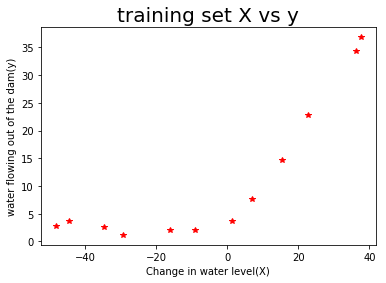

In [5]:
plt.plot(X,y,'r*')
plt.xlabel(r'Change in water level(X)',fontsize=10)
plt.ylabel(r'water flowing out of the dam(y)',fontsize=10)
plt.title('training set X vs y',fontsize=20)
plt.show()

In [6]:
##storing size of X (training set)
m=X.size
print(m)
X=np.insert(X,0,1,1)
Xval=np.insert(Xval,0,1,1)
Xtest=np.insert(Xtest,0,1,1)

12


In [7]:
## hypothesis function
def hypothesis(X,theta):
    return np.dot(X,theta)

In [8]:
## Regularized linear regression cost function
def ComputeCost(theta,X,y,mylambda):
    theta = theta.reshape(X.shape[1],1)
    m=len(X)
    hypo = hypothesis(X,theta)
    cost = float((1./(2*m)) * np.dot((hypo-y).T,(hypo-y)))
    regterm = (theta[1:]).T.dot(theta[1:])* float(mylambda/(2*len(X)))     
    return cost + regterm

In [9]:
theta = np.ones((2,1))
ComputeCost(theta.flatten(),X,y,1)

array([[303.99319222]])

In [10]:
## Regularized linear regression grad function

In [11]:
def ComputeGrad(theta,X,y,mylambda):
    theta = theta.reshape(X.shape[1],1)
    grad = np.dot(X.T,(hypothesis(X,theta) - y)) / (len(X)) 
    regterm = (mylambda/len(X))*theta   ###  these formulas should be carefully written otherwise they will give an error 
                                        ##   in fmin_cg saying "desired error not achieved due to precision loss"
    regterm[0]=0
    regterm.reshape((grad.shape[0],1))
    return  (grad+regterm).flatten()
    

In [12]:
print(ComputeGrad(theta,X,y,1))

[-15.30301567 598.25074417]


Train Linear Regression

In [13]:
### fitting linear regression
def TrainLinearRegression(X,y,mylambda):
    initial_theta = np.zeros((1,X.shape[1])).flatten()
    theta=0
    theta = scipy.optimize.fmin_cg(ComputeCost,x0=initial_theta,fprime=ComputeGrad,args=(X,y,mylambda))
    return theta

In [14]:
opt_theta=TrainLinearRegression(X,y,0)
print(opt_theta)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
[13.08790351  0.36777923]


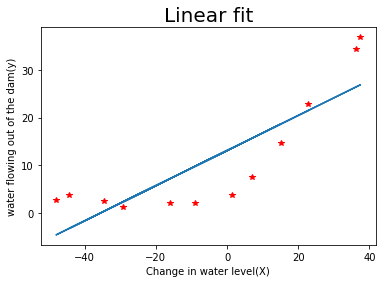

In [15]:
## visualizing thetas
new_hypo=hypothesis(X,opt_theta)
plt.plot(X[:,1],y,'r*')
plt.xlabel(r'Change in water level(X)',fontsize=10)
plt.ylabel(r'water flowing out of the dam(y)',fontsize=10)
plt.title('Linear fit',fontsize=20)
plt.plot(X[:,1:],new_hypo)

# Bias Variance

## learning curves

In [16]:
def learningCurve(X,y,Xval,yval,mylambda=0):
    learned_theta = np.zeros((1,len(X[0])))
    error_train = np.zeros((m, 1))
    error_val   = np.zeros((m, 1))
    for i in range(len(X)):    #### WE ARE TRAINING THETA OVER DIFFERENT TRAINING SET SIZES
        
        learned_theta = TrainLinearRegression(X[0:i+1],y[0:i+1],mylambda)
        '''
        If you are using your cost function (linearRegCostFunction)
%       to compute the training and cross validation error, you should 
%       call the function with the lambda argument set to 0. 
%       Do note that you will still need to use lambda when running
%       the training to obtain the theta parameters.
        '''
        error_train[i]=ComputeCost(learned_theta,X[0:i+1],y[0:i+1],0)  ##STORING THE ERROR FOR DIFFERENT SIZE OF TRAINING SET
        #print(error_train[i])
        error_val[i]=ComputeCost(learned_theta,Xval,yval,0)      ##STORING THE ERROR FOR DIFFERENT SIZE OF CROSS VALID. SET
        #print(error_val[i])
    return error_train,error_val
    
        

In [17]:
error_train,error_val=learningCurve(X,y,Xval,yval,mylambda=0)
print(Xval)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 22
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 22
         Function evaluations: 34
        

[[3.94430453e-31]
 [2.85962078e-30]
 [3.28659505e+00]
 [2.84267769e+00]
 [1.31540488e+01]
 [1.94439625e+01]
 [2.00985217e+01]
 [1.81728587e+01]
 [2.26094054e+01]
 [2.32614616e+01]
 [2.43172496e+01]
 [2.23739065e+01]]


array([[205.12109575],
       [110.30036611],
       [ 45.01023181],
       [ 48.36891137],
       [ 35.86514112],
       [ 33.82995682],
       [ 31.97098678],
       [ 30.86244632],
       [ 31.13599796],
       [ 28.93620747],
       [ 29.55143162],
       [ 29.43381813]])

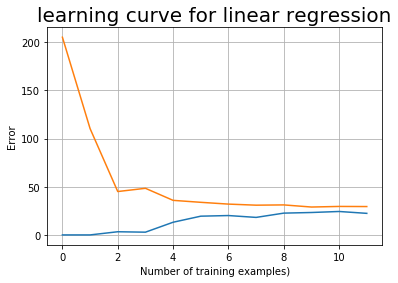

In [18]:
plt.xlabel(r'Number of training examples)',fontsize=10)
plt.ylabel(r'Error',fontsize=10)
plt.title('learning curve for linear regression',fontsize=20)
m_array=np.arange(m)
plt.plot(m_array[0:m],error_train[0:m],label='training ')
plt.plot(m_array[0:m],error_val[0:m],label='cross validation')
plt.grid(True)
print(error_train)
error_val

# polynomial regression

In [19]:
'''
X mein phle se one add hai
POLYFEATURES(X, p) takes a data matrix X (size m x 2) and
%   maps each example into its polynomial features where
%   X_poly(i, :) = [ONES(m,1) , X(i), X(i).^2  , X(i).^3 ...  X(i).^p];
'''
def polyFeatures(X,p):
    X_column=np.array(X[:,1])
    for i in range(p-1):
        X=np.insert(X,i+2,X_column**(i+2),axis=1)
    return X

In [20]:
print(X.shape)


(12, 2)


## Learning polynomial regression

In [21]:
'''
FEATURENORMALIZE Normalizes the features in X 
 FEATURENORMALIZE(X) returns a normalized version of X where
 the mean value of each feature is 0 and the standard deviation
 is 1. This is often a good preprocessing step to do when
 working with learning algorithms.
'''
def featureNormalize(normX,p):
    mean_array=np.zeros((p,1))
    std_array=np.zeros((p,1))
    for i in range(1,normX.shape[1]):
        
        mean=np.mean(normX[:,i])
        mean_array[i-1]=mean
        std=normX[:,i].std()
        std_array[i-1]=std

        normX[:,i]=(normX[:,i]-mean)/std
    return normX,mean_array.T,std_array.T

In [22]:
p=8   ### this the degree of polynomial upto which we have to make our features

In [23]:
newX=polyFeatures(X,p)                                    ###   making polynomial feature
normX,mean_array,std_array=featureNormalize(newX,p)       ###   normalizing the features and return mean and std arrays
mytheta = np.ones((normX.shape[1],1))                    
new_theta=TrainLinearRegression(normX,y,0)                ###    train over lambda = 0

X_poly_val=polyFeatures(Xval,p)                       ###   making polynomial feature
#print(x_poly)
X_norm_val = (X_poly_val[:,1:]-mean_array)/std_array   ### here we are using the mean_array and std_array calculated from original training set.
X_norm_val=np.insert(X_norm_val,0,1,1)


X_poly_test=polyFeatures(Xtest,p)                       ###   making polynomial feature
#print(x_poly)
X_norm_test = (X_poly_test[:,1:]-mean_array)/std_array   ### here we are using the mean_array and std_array calculated from original training set.
X_norm_test=np.insert(X_norm_test,0,1,1)


Optimization terminated successfully.
         Current function value: 0.028899
         Iterations: 1293
         Function evaluations: 2502
         Gradient evaluations: 2502


In [24]:
def plotfit(minx,maxx,mean_array,std_array,theta,p):

    plt.axis([-80,80,-10,100])    ###   specifying the size of axis 
    plt.plot(X[:,1],y,'r*')      ####  plotting original training set values 
    plt.xlabel(r'Change in water level(X)',fontsize=10)
    plt.ylabel(r'water flowing out of the dam(y)',fontsize=10)
    plt.title('Polynomial fit',fontsize=20)
    x=np.arange(minx-15,maxx+25,0.05)    #####% We plot a range slightly bigger than the min and max values to get
                                                 #% an idea of how the fit will vary outside the range of the data points                                                
    x=np.array(x).reshape(x.shape[0],1)
    x=np.insert(x,0,1,1)    
    #print(x.shape)
    x_poly=polyFeatures(x,p)
    #print(x_poly)
    x_norm = (x_poly[:,1:]-mean_array)/std_array   ### here we are using the mean_array and std_array calculated from 
                                                   ### original training set.
    x_norm=np.insert(x_norm,0,1,1)
    #print(mean_array)
    #print(std_array)
    plt.plot(x[:,1:],x_norm.dot(new_theta.T),'b--')
    #print(x_norm)
    #print(new_theta)
    '''
    you should see that the polynomial ﬁt is able to follow the datapoints very well - thus, 
    obtaining a low training error.However, the polynomial ﬁt is very complex and even drops 
    oﬀ at the extremes. This is an indicator that the polynomial regression model is 
    overﬁtting the training data and will not generalize well. 
    '''


Optimization terminated successfully.
         Current function value: 0.028899
         Iterations: 1293
         Function evaluations: 2502
         Gradient evaluations: 2502


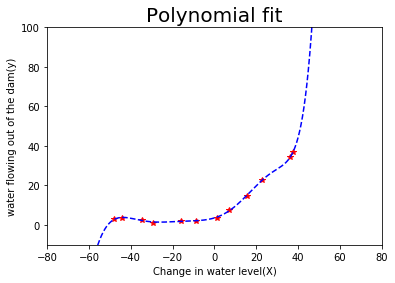

In [25]:
minx=X[:,1].min()
maxx=X[:,1].max()
new_theta=TrainLinearRegression(normX,y,0)
plotfit(minx,maxx,mean_array,std_array,new_theta,p)


In [26]:
error_train_poly,error_val_poly=learningCurve(normX,y,X_norm_val,yval,mylambda=0)   ### at lambda = 0

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 80
         Function evaluations: 149
        

'\nhere you can notice that the error at the range where the polynomial fits is less \nand the error at the extremes is more shown by spikes .\n'

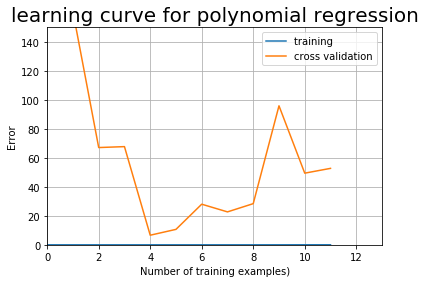

In [27]:

plt.xlabel(r'Number of training examples)',fontsize=10)
plt.ylabel(r'Error',fontsize=10)
plt.title('learning curve for polynomial regression',fontsize=20)
m_array=np.arange(m)
plt.plot(m_array[0:m],error_train_poly[0:m],label='training ')
plt.plot(m_array[0:m],error_val_poly[0:m],label='cross validation')
plt.grid(True)
plt.axis([0,13,0,150])
plt.legend()

'''
here you can notice that the error at the range where the polynomial fits is less 
and the error at the extremes is more shown by spikes .
'''

Optimization terminated successfully.
         Current function value: 6.830463
         Iterations: 34
         Function evaluations: 62
         Gradient evaluations: 62


'\nFor λ = 1, you should see a polynomial ﬁt that follows the data trend well.\n'

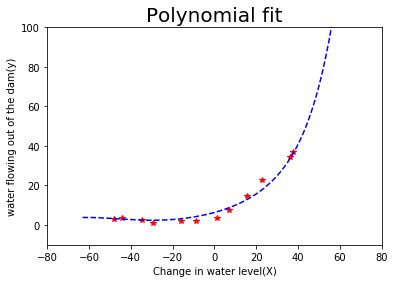

In [28]:
new_theta=TrainLinearRegression(normX,y,1)     ###### training at lambda = 1
plotfit(minx,maxx,mean_array,std_array,new_theta,p)

'''
For λ = 1, you should see a polynomial ﬁt that follows the data trend well.
'''

In [29]:
error_train_poly,error_val_poly=learningCurve(normX,y,X_norm_val,yval,mylambda=1)   ### errors at lambda = 1

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.070327
         Iterations: 20
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 17.182727
         Iterations: 22
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 13.476899
         Iterations: 17
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 10.781524
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 9.347014
         Iterations: 31
         Function evaluations: 52
   

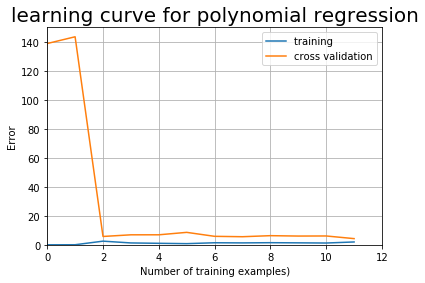

In [30]:
'''
For λ = 1, you should see that learning curve showing that both the cross validation and training error converge to a
relatively low value. This shows the λ = 1 regularized polynomial regression model does not have the highbias or 
high-variance problems. In eﬀect, it achieves a good trade-oﬀ between bias and variance. 
'''
plt.xlabel(r'Number of training examples)',fontsize=10)
plt.ylabel(r'Error',fontsize=10)
plt.title('learning curve for polynomial regression',fontsize=20)
m_array=np.arange(m)
plt.plot(m_array[0:m],error_train_poly[0:m],label='training ')
plt.plot(m_array[0:m],error_val_poly[0:m],label='cross validation')
plt.grid(True)
plt.axis([0,12,0,150])
plt.legend()

In [31]:
'''
For λ = 100, you should see a polynomial ﬁt (Figure 8) that does not follow the data well.
In this case, there is too much regularization and the model is unable to ﬁt the training data.

'''

'\nFor λ = 100, you should see a polynomial ﬁt (Figure 8) that does not follow the data well.\nIn this case, there is too much regularization and the model is unable to ﬁt the training data.\n\n'

Optimization terminated successfully.
         Current function value: 65.950955
         Iterations: 9
         Function evaluations: 17
         Gradient evaluations: 17


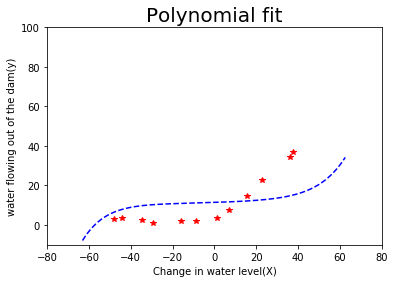

In [32]:
new_theta=TrainLinearRegression(normX,y,100)    ## at lambda =100
plotfit(minx,maxx,mean_array,std_array,new_theta,p)

In [33]:
'''
Validation for Selecting Lambda =============
%  You will now implement validationCurve to test various values of 
%  lambda on a validation set. You will then use this to select the
%  "best" lambda value.
'''
'''
VALIDATIONCURVE Generate the train and validation errors needed to
%plot a validation curve that we can use to select lambda
%   [lambda_vec, error_train, error_val] = ...
%       VALIDATIONCURVE(X, y, Xval, yval) returns the train
%       and validation errors (in error_train, error_val)
%       for different values of lambda. You are given the training set (X,
%       y) and validation set (Xval, yval).
%
'''

'\nVALIDATIONCURVE Generate the train and validation errors needed to\n%plot a validation curve that we can use to select lambda\n%   [lambda_vec, error_train, error_val] = ...\n%       VALIDATIONCURVE(X, y, Xval, yval) returns the train\n%       and validation errors (in error_train, error_val)\n%       for different values of lambda. You are given the training set (X,\n%       y) and validation set (Xval, yval).\n%\n'

In [34]:
'''
this function return training errors in 
%               error_train and the validation errors in error_val. The 
%               vector lambda_vec contains the different lambda parameters 
%               to use for each calculation of the errors, i.e, 
%               error_train(i), and error_val(i) should give 
%               you the errors obtained after training with 
%               lambda = lambda_vec(i)
'''
#% Selected values of lambda (you should not change this)
lambda_vec = [0 ,0.001 ,0.003, 0.01, 0.03 ,0.1 ,0.3, 1, 3 ,10]
lambda_vec = np.array(lambda_vec).reshape(10,1)
def validationCurve(X,y,Xval,yval):
    

#% You need to return these variables correctly.
    error_train = np.zeros((10, 1))
    error_val = np.zeros((10, 1))
    for i in range(len(lambda_vec)):
        mylambda = lambda_vec[i]
        learned_theta = TrainLinearRegression(X,y,mylambda)
        error_train[i] = ComputeCost(learned_theta,X,y,0)
        error_val[i] = ComputeCost(learned_theta,Xval,yval,0)
    return error_train,error_val

In [35]:
error_train,error_val=validationCurve(normX,y,X_norm_val,yval)



Optimization terminated successfully.
         Current function value: 0.028899
         Iterations: 1293
         Function evaluations: 2502
         Gradient evaluations: 2502
Optimization terminated successfully.
         Current function value: 0.169418
         Iterations: 377
         Function evaluations: 727
         Gradient evaluations: 727
Optimization terminated successfully.
         Current function value: 0.243172
         Iterations: 189
         Function evaluations: 372
         Gradient evaluations: 372
Optimization terminated successfully.
         Current function value: 0.371283
         Iterations: 218
         Function evaluations: 413
         Gradient evaluations: 413
Optimization terminated successfully.
         Current function value: 0.636703
         Iterations: 137
         Function evaluations: 241
         Gradient evaluations: 241
Optimization terminated successfully.
         Current function value: 1.360572
         Iterations: 76
         Function 

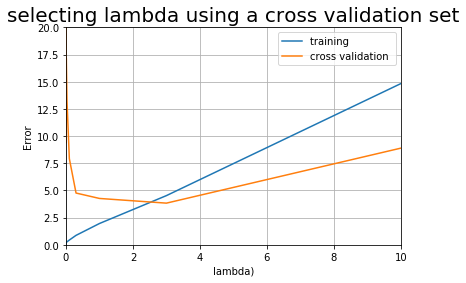

In [36]:

plt.xlabel(r'lambda)',fontsize=10)
plt.ylabel(r'Error',fontsize=10)
plt.title('selecting lambda using a cross validation set',fontsize=20)

plt.plot(np.array(lambda_vec),error_train,label='training ')
plt.plot(lambda_vec,error_val,label='cross validation ')
plt.grid(True)
plt.axis([0,10,0,20])
plt.legend()

In [37]:
###] best possible value of lambda is 3  bcoz cv error is least there

In [47]:
new_theta=TrainLinearRegression(normX,y,3) 
print(new_theta)
ComputeCost(new_theta,X_norm_test,ytest,0)

Optimization terminated successfully.
         Current function value: 14.937646
         Iterations: 13
         Function evaluations: 24
         Gradient evaluations: 24
[11.21758933  6.52208569  3.8248778   3.61985124  2.18396299  2.1060465
  1.28077547  1.28789924  0.72492517]


array([[3.57202662]])

In [39]:
#Plotting learning curves with randomly selected examples


In [40]:
'''
Concretely, to determine the training error and cross validation error for i examples,
you should ﬁrst randomly select i examples from the training set and i examples from the
cross validation set. You will then learn the parameters θ using the randomly chosen
training set and evaluate the parameters θ on the randomly chosen training set and 
cross validation set. The above steps should then be repeated multiple times (say 50) and
the averaged error should be used to determine the training error and cross validation error 
for i examples. For this optional (ungraded) exercise, you should implement the above strategy
for computing the learning curves. For reference, ﬁgure 10 shows the learning curve we obtained 
for polynomial regression with λ = 0.01. Your ﬁgure may diﬀer slightly due to the random selection of examples
'''

iterations=50

avg_error_train=np.zeros((len(X),1))
avg_error_val=np.zeros((len(X),1))
for i in range(len(X)):
    
    error_train = np.zeros((iterations, 1))
    error_val = np.zeros((iterations, 1))
    
    for j in range(iterations):
        r1 = np.random.randint(len(X), size=i+1)
        
        norm_randX=normX[r1]
        rand_y=y[r1]
        
        r2 = np.random.randint(len(Xval), size=i+1)
        norm_randval=X_norm_val[r2]
        rand_yval=yval[r2]
    
        learned_theta = TrainLinearRegression(norm_randX,rand_y,0.01)  ### at lambda 0.01

        error_train[j] = ComputeCost(learned_theta,norm_randX,rand_y,0)    ### storing the cost 
        error_val[j] = ComputeCost(learned_theta,norm_randval,rand_yval,0)
    avg_error_train[i]=error_train.mean()    ### taking the average error
    avg_error_val[i]=error_val.mean()        ### taking the average error


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 22
         Gra

Optimization terminated successfully.
         Current function value: 0.067219
         Iterations: 20
         Function evaluations: 60
         Gradient evaluations: 60
Optimization terminated successfully.
         Current function value: 0.504099
         Iterations: 3
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.012748
         Iterations: 21
         Function evaluations: 67
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 0.573018
         Iterations: 3
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000031
         Iterations: 3
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.009268
         Iterations: 3
         Function evaluations: 10
      

Optimization terminated successfully.
         Current function value: 0.217295
         Iterations: 32
         Function evaluations: 76
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 0.343744
         Iterations: 13
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.011709
         Iterations: 31
         Function evaluations: 62
         Gradient evaluations: 62
Optimization terminated successfully.
         Current function value: 0.475866
         Iterations: 54
         Function evaluations: 100
         Gradient evaluations: 100
Optimization terminated successfully.
         Current function value: 0.000556
         Iterations: 13
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.090492
         Iterations: 20
         Function evaluations: 43


Optimization terminated successfully.
         Current function value: 0.357678
         Iterations: 18
         Function evaluations: 47
         Gradient evaluations: 47
Optimization terminated successfully.
         Current function value: 0.347754
         Iterations: 43
         Function evaluations: 97
         Gradient evaluations: 97
Optimization terminated successfully.
         Current function value: 0.155782
         Iterations: 21
         Function evaluations: 48
         Gradient evaluations: 48
Optimization terminated successfully.
         Current function value: 0.323984
         Iterations: 46
         Function evaluations: 91
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 0.094337
         Iterations: 39
         Function evaluations: 94
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 0.180919
         Iterations: 21
         Function evaluations: 48
  

Optimization terminated successfully.
         Current function value: 0.336635
         Iterations: 13
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 0.345496
         Iterations: 21
         Function evaluations: 59
         Gradient evaluations: 59
Optimization terminated successfully.
         Current function value: 0.318761
         Iterations: 109
         Function evaluations: 197
         Gradient evaluations: 197
Optimization terminated successfully.
         Current function value: 0.453249
         Iterations: 12
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.094651
         Iterations: 56
         Function evaluations: 117
         Gradient evaluations: 117
Optimization terminated successfully.
         Current function value: 0.124434
         Iterations: 39
         Function evaluations: 

Optimization terminated successfully.
         Current function value: 0.089610
         Iterations: 47
         Function evaluations: 111
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: 0.457323
         Iterations: 37
         Function evaluations: 71
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 0.419736
         Iterations: 10
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.254667
         Iterations: 68
         Function evaluations: 156
         Gradient evaluations: 156
Optimization terminated successfully.
         Current function value: 0.058424
         Iterations: 108
         Function evaluations: 209
         Gradient evaluations: 209
Optimization terminated successfully.
         Current function value: 0.289157
         Iterations: 52
         Function evaluations

Optimization terminated successfully.
         Current function value: 0.084893
         Iterations: 113
         Function evaluations: 222
         Gradient evaluations: 222
Optimization terminated successfully.
         Current function value: 0.264478
         Iterations: 92
         Function evaluations: 164
         Gradient evaluations: 164
Optimization terminated successfully.
         Current function value: 0.339563
         Iterations: 161
         Function evaluations: 276
         Gradient evaluations: 276
Optimization terminated successfully.
         Current function value: 0.097785
         Iterations: 27
         Function evaluations: 68
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 0.149996
         Iterations: 58
         Function evaluations: 111
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: 0.326049
         Iterations: 65
         Function evaluati

Optimization terminated successfully.
         Current function value: 0.195246
         Iterations: 93
         Function evaluations: 189
         Gradient evaluations: 189
Optimization terminated successfully.
         Current function value: 0.312372
         Iterations: 23
         Function evaluations: 55
         Gradient evaluations: 55
Optimization terminated successfully.
         Current function value: 0.269666
         Iterations: 118
         Function evaluations: 243
         Gradient evaluations: 243
Optimization terminated successfully.
         Current function value: 0.374524
         Iterations: 92
         Function evaluations: 193
         Gradient evaluations: 193
Optimization terminated successfully.
         Current function value: 0.286914
         Iterations: 14
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.343560
         Iterations: 39
         Function evaluations

Optimization terminated successfully.
         Current function value: 0.069203
         Iterations: 181
         Function evaluations: 300
         Gradient evaluations: 300
Optimization terminated successfully.
         Current function value: 0.279925
         Iterations: 195
         Function evaluations: 330
         Gradient evaluations: 330
Optimization terminated successfully.
         Current function value: 0.291100
         Iterations: 137
         Function evaluations: 262
         Gradient evaluations: 262
Optimization terminated successfully.
         Current function value: 0.326694
         Iterations: 214
         Function evaluations: 372
         Gradient evaluations: 372
Optimization terminated successfully.
         Current function value: 0.196146
         Iterations: 14
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.305627
         Iterations: 66
         Function evalua

Optimization terminated successfully.
         Current function value: 0.244565
         Iterations: 133
         Function evaluations: 237
         Gradient evaluations: 237
Optimization terminated successfully.
         Current function value: 0.107277
         Iterations: 76
         Function evaluations: 161
         Gradient evaluations: 161
Optimization terminated successfully.
         Current function value: 0.323141
         Iterations: 67
         Function evaluations: 121
         Gradient evaluations: 121
Optimization terminated successfully.
         Current function value: 0.316042
         Iterations: 154
         Function evaluations: 268
         Gradient evaluations: 268
Optimization terminated successfully.
         Current function value: 0.332978
         Iterations: 182
         Function evaluations: 320
         Gradient evaluations: 320
Optimization terminated successfully.
         Current function value: 0.196061
         Iterations: 17
         Function evalu

Optimization terminated successfully.
         Current function value: 0.301942
         Iterations: 232
         Function evaluations: 417
         Gradient evaluations: 417
Optimization terminated successfully.
         Current function value: 0.221003
         Iterations: 142
         Function evaluations: 275
         Gradient evaluations: 275
Optimization terminated successfully.
         Current function value: 0.252335
         Iterations: 228
         Function evaluations: 415
         Gradient evaluations: 415
Optimization terminated successfully.
         Current function value: 0.060450
         Iterations: 10
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.220278
         Iterations: 122
         Function evaluations: 243
         Gradient evaluations: 243
Optimization terminated successfully.
         Current function value: 0.324281
         Iterations: 28
         Function evalua

Optimization terminated successfully.
         Current function value: 0.284414
         Iterations: 49
         Function evaluations: 93
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 0.271427
         Iterations: 227
         Function evaluations: 361
         Gradient evaluations: 361
Optimization terminated successfully.
         Current function value: 0.275388
         Iterations: 45
         Function evaluations: 81
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 0.405743
         Iterations: 110
         Function evaluations: 237
         Gradient evaluations: 237
Optimization terminated successfully.
         Current function value: 0.227956
         Iterations: 105
         Function evaluations: 198
         Gradient evaluations: 198
Optimization terminated successfully.
         Current function value: 0.333208
         Iterations: 204
         Function evaluati

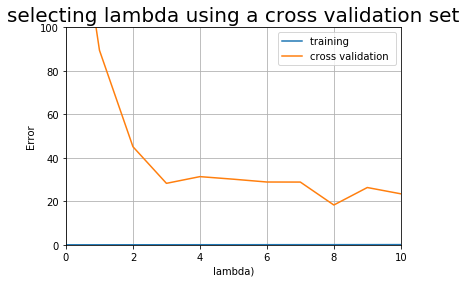

In [41]:

plt.xlabel(r'lambda)',fontsize=10)
plt.ylabel(r'Error',fontsize=10)
plt.title('selecting lambda using a cross validation set',fontsize=20)

plt.plot(avg_error_train,label='training ')
plt.plot(avg_error_val,label='cross validation ')
plt.grid(True)
plt.axis([0,10,0,100])
plt.legend()